# Pattern Images

## 1. Import libraries, upload data, define necessary columns

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functions import load_and_prepare_data

In [2]:
X, y = load_and_prepare_data()

In [3]:
# Cell density
cell_density_cols = [col for col in X.columns if 'cell density' in col.lower()]
cell_density_cols = [col for col in cell_density_cols if 'gradient' not in col.lower()]

# Average DO concentration
DO_cols = [col for col in X.columns if 'average do concentration' in col.lower()]
DO_cols = [col for col in DO_cols if 'gradient' not in col.lower()]
DO_cols = [col for col in DO_cols if '2nd derivative' not in col.lower()]
DO_cols.remove('Average DO concentration d0')
DO_cols.remove('Average DO concentration d1')

# DO gradient/ cell count
DO_gradient_CC_cols = [col for col in X.columns if 'do gradient/cell count' in col.lower()]

# Glucose Concentration
glucose_concentration_cols = [col for col in X.columns if 'glucose concentration' in col.lower()]

# Average pH
pH_cols = [col for col in X.columns if 'average ph' in col.lower()]
pH_cols = [col for col in pH_cols if 'gradient' not in col.lower()]
pH_cols.remove('Overall Average pH')

# Average pH gradient
pH_gradient_cols = [col for col in X.columns if 'average ph gradient' in col.lower()]

In [4]:
# Get head of Cell density dataframe
X_Cell_Density = X[cell_density_cols]
X_Cell_Density_head = X_Cell_Density.head()
X_Cell_Density_head = X_Cell_Density_head.round(4)

X_Cell_Density_head['Experiment'] = X_Cell_Density_head.index.astype(str)
X_Cell_Density_head = X_Cell_Density_head[['Experiment'] + list(X_Cell_Density_head.columns[:-1])]

fig, ax = plt.subplots(figsize=(6, 2))
ax.axis('tight')
ax.axis('off')

table_data = plt.table(cellText=X_Cell_Density_head.values,
                       colLabels=X_Cell_Density_head.columns,
                       loc='center',
                       cellLoc='center',
                       colColours=["#D4E6F1"] * X_Cell_Density_head.shape[1])

for (row, col), cell in table_data.get_celld().items():
    if row == 0:  
        cell.set_text_props(weight='bold', color='black')
        cell.set_facecolor('#AED6F1')
    else:  # Data rows
        cell.set_facecolor('#F7F9F9')

# Save the table as an image
plt.savefig("Cell density input dataset structure1.png", dpi=300, bbox_inches='tight')
plt.close()

## 2. Plots and images used for the document

In [5]:
def plot_biovar_all_points(X: pd.DataFrame, cols_biovar: list, x_axis: list, y_limits: list = None, title: str = ''):
    X_biovar = X[cols_biovar]
    X_biovar_t = np.transpose(X_biovar)

    x_axis = np.array(x_axis)

    plt.plot(x_axis, X_biovar_t, marker='o', linestyle='-', color = 'c')
    if y_limits:
        plt.ylim(y_limits[0],y_limits[1])
    plt.title(title)
    plt.xlabel('Differentiation Days')
    plt.show()

In [6]:
def plot_biovar_bicluster(X:pd.DataFrame, cols_biovar: list, row_col_indexes:list, days_bicluster: list, x_limits: list = None, y_limits: list=None, title: str =''):
    X_biovar = X[cols_biovar]
    X_bicluster = X_biovar.iloc[row_col_indexes[0], row_col_indexes[1]]
    X_bicluster = np.transpose(X_bicluster)
    
    days_bicluster = np.array(days_bicluster)

    plt.plot(days_bicluster, X_bicluster, marker='o', linestyle='-')
    if y_limits:
        plt.ylim(y_limits[0],y_limits[1])
    if x_limits:
        plt.xlim(x_limits[0],x_limits[1])
    plt.title(title)
    plt.xlabel('Differentiation Days')
    plt.show()

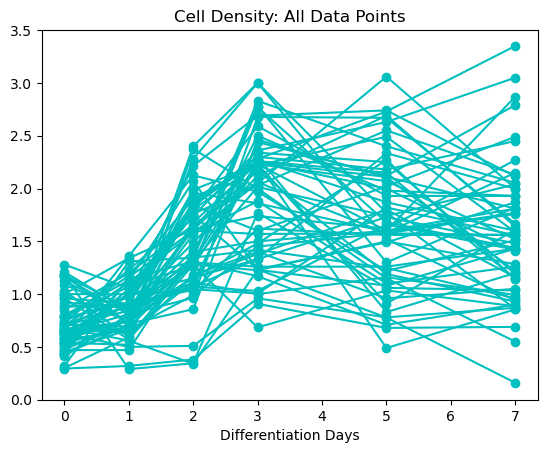

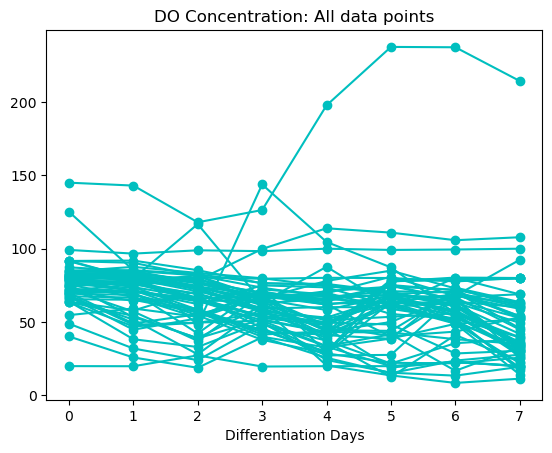

In [7]:
cols_biovars_list = [cell_density_cols, DO_cols]
x_axis_list = [[0,1,2,3,5,7], [0,1,2,3,4,5,6,7]]
y_limits_list = [[0,3.5], []]
titles_list = ['Cell Density: All Data Points', 'DO Concentration: All data points']

for (cols_biovar, x_axis, y_limits, title) in zip(cols_biovars_list, x_axis_list, y_limits_list, titles_list):
    plot_biovar_all_points(X=X, cols_biovar = cols_biovar, x_axis = x_axis, y_limits = y_limits, title= title)

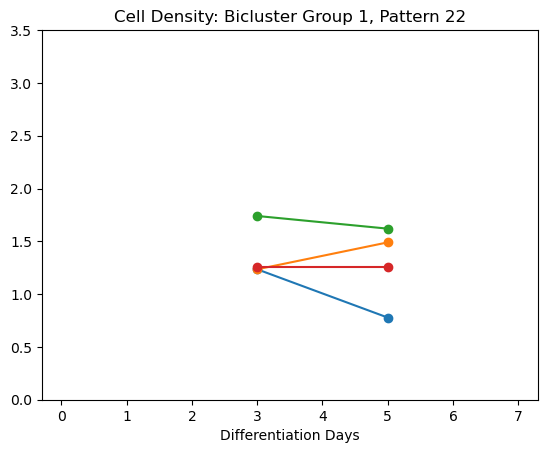

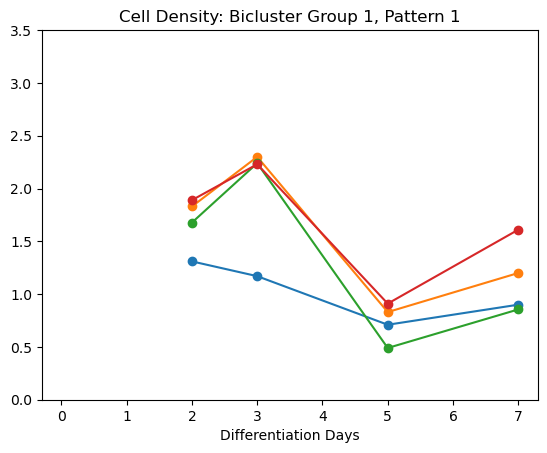

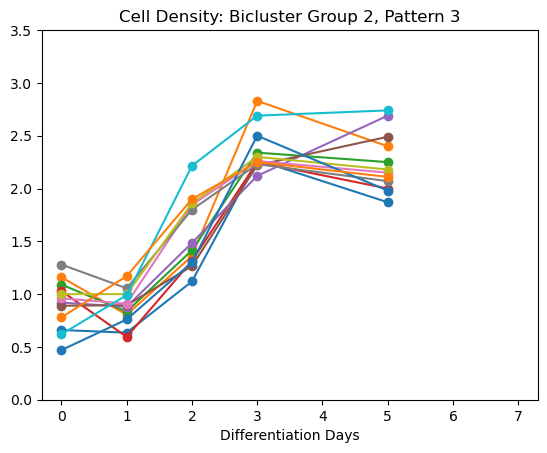

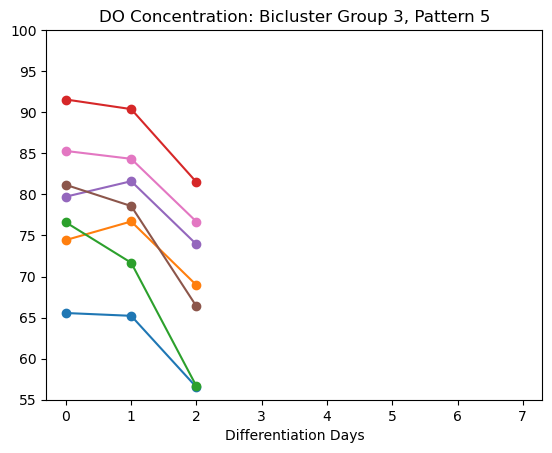

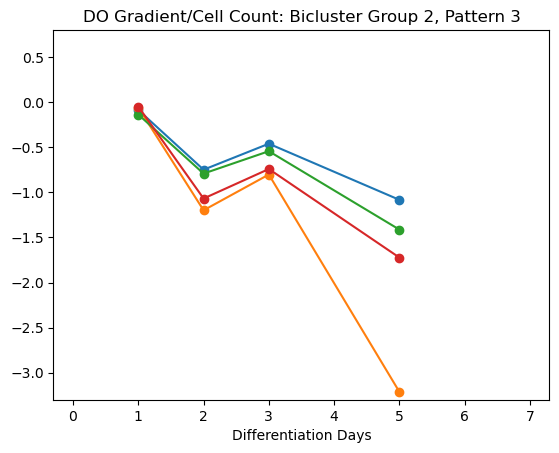

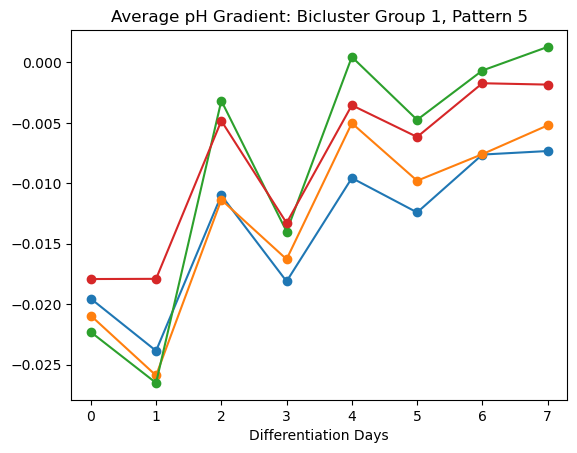

In [8]:
cols_biovar_list = [cell_density_cols, cell_density_cols, cell_density_cols,
                    DO_cols, DO_gradient_CC_cols, pH_gradient_cols]
row_col_indexes_list = [[[23, 24, 25, 37], [3,4]], [[35,46,47,48], [2,3,4,5]], 
                        [[8,10,11,12,13,14,19,27,32,38,41,52], [0,1,2,3,4]],
                        [[11,14,23,25,37,40,41], [0,1,2]], [[14, 21, 36, 37], [1,2,3,4]],
                        [[13,14,49,57], [2,3,4,5,6,7,8,9]]]
days_biclusters_list = [[3,5], [2,3,5,7], [0,1,2,3,5], [0,1,2], [1,2,3,5], [0,1,2,3,4,5,6,7]]
y_limits_list = [[0,3.5], [0,3.5], [0,3.5], [55,100], [-3.3, 0.8], []]
x_limits_list = [[-0.3,7.3], [-0.3,7.3], [-0.3,7.3], [-0.3,7.3], [-0.3,7.3], [-0.3,7.3]]
titles_list = ['Cell Density: Bicluster Group 1, Pattern 22', 'Cell Density: Bicluster Group 1, Pattern 1',
               'Cell Density: Bicluster Group 2, Pattern 3', 'DO Concentration: Bicluster Group 3, Pattern 5',
               'DO Gradient/Cell Count: Bicluster Group 2, Pattern 3', 'Average pH Gradient: Bicluster Group 1, Pattern 5']

for (cols_biovar, row_col_indexes, days_bicluster, y_limits, x_limits, title) in zip(cols_biovar_list, row_col_indexes_list, days_biclusters_list, y_limits_list, x_limits_list, titles_list):
    plot_biovar_bicluster(X=X, cols_biovar=cols_biovar, row_col_indexes=row_col_indexes, days_bicluster=days_bicluster, y_limits=y_limits, x_limits=x_limits, title=title)